### UDEMY COURSES DATA ANALYSIS

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
df = pd.read_csv('./Udemy-Courses.csv')
df.head(3)

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,288942,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35,3137,18,68,All Levels,1.5 hours,2014-09-18T05:07:05Z,Musical Instruments
1,1170074,#10 Hand Coordination - Transfer Chord Ballad ...,True,75,1593,1,41,Intermediate Level,1 hour,2017-04-12T19:06:34Z,Musical Instruments
2,1193886,#12 Hand Coordination: Let your Hands dance wi...,True,75,482,1,47,Intermediate Level,1.5 hours,2017-04-26T18:34:57Z,Musical Instruments


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3682 entries, 0 to 3681
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   course_id            3682 non-null   int64 
 1   course_title         3682 non-null   object
 2   is_paid              3682 non-null   bool  
 3   price                3682 non-null   object
 4   num_subscribers      3682 non-null   int64 
 5   num_reviews          3682 non-null   int64 
 6   num_lectures         3682 non-null   int64 
 7   level                3682 non-null   object
 8   content_duration     3682 non-null   object
 9   published_timestamp  3682 non-null   object
 10  subject              3682 non-null   object
dtypes: bool(1), int64(4), object(6)
memory usage: 291.4+ KB


In [4]:
df.describe()

,course_id,num_subscribers,num_reviews,num_lectures
count,3.682000e+03,3682.000000,3682.000000,3682.000000
mean,6.766121e+05,3194.230310,156.093156,40.065182
std,3.436355e+05,9499.378361,934.957204,50.373299
min,8.324000e+03,0.000000,0.000000,0.000000
25%,4.078430e+05,110.250000,4.000000,15.000000
50%,6.885580e+05,911.500000,18.000000,25.000000
75%,9.617515e+05,2540.250000,67.000000,45.000000
max,1.282064e+06,268923.000000,27445.000000,779.000000


In [5]:
pd.DataFrame(df.shape)

,0
0,3682
1,11


**Counts the number of paid and unpaid courses.**

In [6]:
pd.DataFrame(df['is_paid'].value_counts())

,count
is_paid,
True,3372
False,310


**Average price of paid courses**

In [7]:
df['price'].dtype

dtype('O')

**First convert the non-numeric values to numeric**

In [8]:
df['price'] = df['price'].replace('Free', 0)
df['price'] = pd.to_numeric(df['price'], errors='coerce')

In [9]:
df['price'].dtype

dtype('int64')

In [10]:
print(f'Average price of paid courses: {df[df['is_paid'] == True]['price'].mean()}')

Average price of paid courses: 72.07888493475681


**Average number of subscribers of free vs paid courses**

In [11]:
pd.DataFrame(df.groupby('is_paid')['num_subscribers'].mean())

,num_subscribers
is_paid,
False,11533.951613
True,2427.529953


**Top 5 most subscribed courses**

In [12]:
df.sort_values('num_subscribers', ascending=False).head()

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
2230,41295,Learn HTML5 Programming From Scratch,False,0,268923,8629,45,All Levels,10.5 hours,2013-02-14T07:03:41Z,Web Development
776,59014,Coding for Entrepreneurs Basic,False,0,161029,279,27,Beginner Level,3.5 hours,2013-06-09T15:51:55Z,Web Development
3385,625204,The Web Developer Bootcamp,True,200,121584,27445,342,All Levels,43 hours,2015-11-02T21:13:27Z,Web Development
640,173548,Build Your First Website in 1 Week with HTML5 ...,False,0,120291,5924,30,Beginner Level,3 hours,2014-04-08T16:21:30Z,Web Development
3316,764164,The Complete Web Developer Course 2.0,True,200,114512,22412,304,All Levels,30.5 hours,2016-03-08T22:28:36Z,Web Development


**Average reviews by course level**

In [13]:
pd.DataFrame(df.groupby('level')['num_reviews'].mean().sort_values(ascending=False))

,num_reviews
level,
All Levels,209.265010
Beginner Level,101.562549
Intermediate Level,92.674584
Expert Level,40.224138


**Courses published per year**

In [14]:
df['published_timestamp'] = pd.to_datetime(df['published_timestamp'])
df['year'] = df['published_timestamp'].dt.year
pd.DataFrame(df['year'].value_counts().sort_index())

,count
year,
2011,5
2012,45
2013,202
2014,491
2015,1014
2016,1206
2017,719


**Correlation between number of subscribers and number of reviews**

In [15]:
df[['num_subscribers', 'num_reviews']].corr()

,num_subscribers,num_reviews
num_subscribers,1.000000,0.649957
num_reviews,0.649957,1.000000


**Courses per difficulty level**

In [16]:
pd.DataFrame(df['level'].value_counts())

,count
level,
All Levels,1932
Beginner Level,1271
Intermediate Level,421
Expert Level,58


**Most popular course (highest subscribers)**

In [17]:
pd.DataFrame(df.loc[df['num_subscribers'].idxmax()])

,2230
course_id,41295
course_title,Learn HTML5 Programming From Scratch
is_paid,False
price,0
num_subscribers,268923
num_reviews,8629
num_lectures,45
level,All Levels
content_duration,10.5 hours
published_timestamp,2013-02-14 07:03:41+00:00


**Most popular course (highest reviews)**

In [18]:
pd.DataFrame(df.loc[df['num_reviews'].idxmax()])

,3385
course_id,625204
course_title,The Web Developer Bootcamp
is_paid,True
price,200
num_subscribers,121584
num_reviews,27445
num_lectures,342
level,All Levels
content_duration,43 hours
published_timestamp,2015-11-02 21:13:27+00:00


**Most popular course (highest: subscribers, reviews, lectures, price)**

In [19]:
pd.DataFrame(df.loc[df[['num_subscribers', 'num_reviews', 'num_lectures', 'price']].idxmax()])

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,year
2230,41295,Learn HTML5 Programming From Scratch,False,0,268923,8629,45,All Levels,10.5 hours,2013-02-14 07:03:41+00:00,Web Development,2013
3385,625204,The Web Developer Bootcamp,True,200,121584,27445,342,All Levels,43 hours,2015-11-02 21:13:27+00:00,Web Development,2015
394,79154,Back to School Web Development and Programming...,True,200,18170,117,779,Beginner Level,44.5 hours,2013-08-19 14:53:00+00:00,Web Development,2013
7,768028,* An Integrated Approach to the Fundamentals o...,True,200,134,14,123,All Levels,5.5 hours,2016-03-15 17:23:07+00:00,Business Finance,2016


**Show graphically Subscribers vs Course Price**

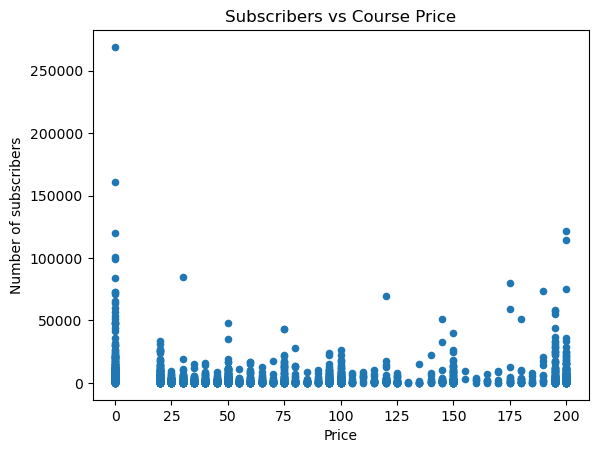

In [20]:
df.plot(x='price', y='num_subscribers', kind='scatter')
plt.title('Subscribers vs Course Price')
plt.xlabel('Price')
plt.ylabel('Number of subscribers')
plt.show()

**Course by difficulty level**

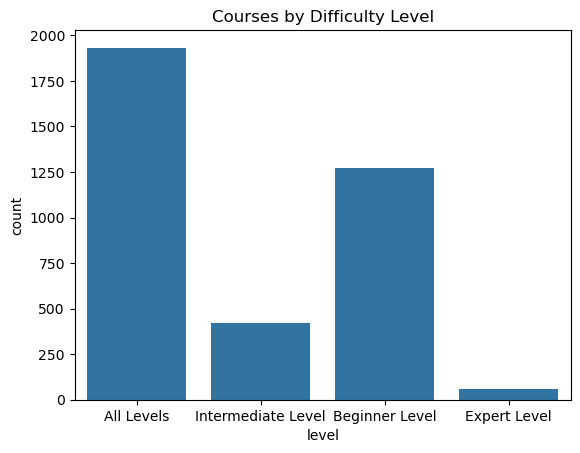

In [21]:
sns.countplot(x='level', data=df)
plt.title('Courses by Difficulty Level')
plt.show()

**Course published per year**

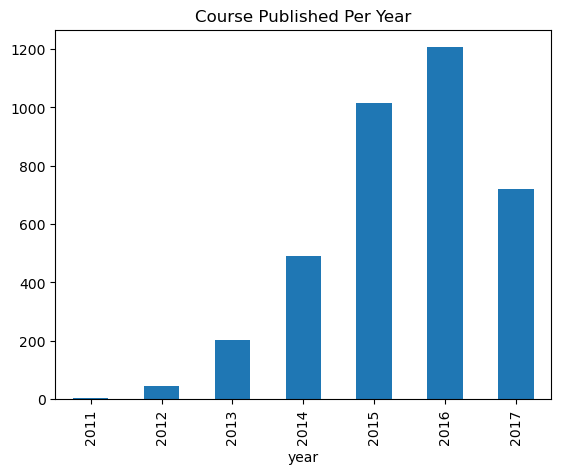

In [22]:
df['year'].value_counts().sort_index().plot(kind='bar')
plt.title('Course Published Per Year')
plt.show()

**Average price by subject**

In [23]:
pd.DataFrame(df.groupby('subject')['price'].mean())

,price
subject,
Business Finance,68.423686
Graphic Design,57.827529
Musical Instruments,49.558824
Web Development,77.033333


**Paid vs Free Course Count**

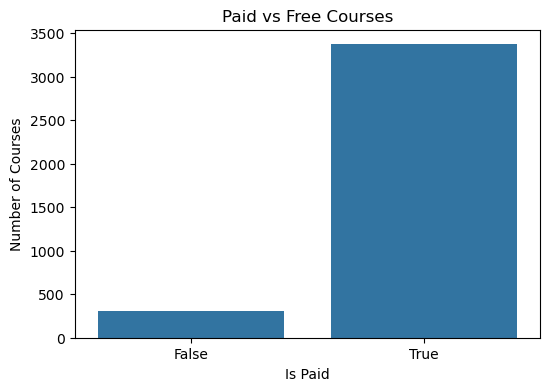

In [34]:
plt.figure(figsize=(6,4))
sns.countplot(x='is_paid', data=df)
# df['is_paid'].plot(kind='bar')
plt.title("Paid vs Free Courses")
plt.xlabel("Is Paid")
plt.ylabel("Number of Courses")
plt.show()

In [36]:
df.groupby('price')[['num_subscribers', 'num_reviews']].mean()

,num_subscribers,num_reviews
price,,
0,11533.951613,425.929032
20,1591.154217,32.659036
25,1109.487013,38.980519
30,1698.529412,67.758824
35,1002.586207,33.068966
40,922.658986,33.668203
45,1192.903614,44.626506
50,1532.869658,56.467949
55,1358.885714,39.257143


**Show all records of "Introduction to Web Development: HTML" where price is greater than 10**

In [43]:
df[(df['course_title'] == 'Introduction to Web Development: HTML') & (df['price'] > 10)]

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,year
1944,159070,Introduction to Web Development: HTML,True,20,26800,333,55,Beginner Level,3 hours,2014-02-13 20:39:33+00:00,Web Development,2014


**Show all records of all courses where price = 0**

In [44]:
df[(df['price'] == 0)]

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,year
41,286070,5 lecciones que todo guitarrista debe tomar,False,0,4452,263,14,Beginner Level,1 hour,2014-08-23 05:08:14+00:00,Musical Instruments,2014
49,696630,"7 Ways A Beginner Guitarist Can Sound Better, ...",False,0,4529,193,7,Beginner Level,36 mins,2015-12-21 18:50:50+00:00,Musical Instruments,2015
57,955914,A beginner`s guide to fingerpicking and strumm...,False,0,3481,29,20,Beginner Level,2 hours,2016-09-13 21:51:59+00:00,Musical Instruments,2016
67,270976,A how to guide in HTML,False,0,7318,205,8,Beginner Level,35 mins,2014-08-10 20:19:10+00:00,Web Development,2014
74,1214144,¡Triunfar en La Bolsa de Valores No Requiere d...,False,0,338,7,6,Beginner Level,1 hour,2017-05-30 14:30:12+00:00,Business Finance,2017
...,...,...,...,...,...,...,...,...,...,...,...,...
3620,552598,WordPress in under an hour - Create/manage you...,False,0,6474,86,15,All Levels,1 hour,2015-07-15 00:21:56+00:00,Web Development,2015
3638,1068590,Wordpress Website Mastery 2017,False,0,5181,64,22,Beginner Level,2.5 hours,2017-01-18 17:01:40+00:00,Web Development,2017
3652,752706,Write quicker HTML5 and CSS 3; productivity ha...,False,0,13016,286,15,All Levels,1.5 hours,2016-03-03 17:45:31+00:00,Web Development,2016
3674,1257976,Your First 10 Guitar Lessons - Learn how to pl...,False,0,924,4,18,Beginner Level,1 hour,2017-06-29 00:29:36+00:00,Musical Instruments,2017


**Show all records of number of subscribers greater than 1000 and price greater than 20 and less than 100**

In [53]:
df[(df['num_subscribers'] > 1000) & ((df['price'] > 20) & (df['price'] <= 100))]

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,year
0,288942,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35,3137,18,68,All Levels,1.5 hours,2014-09-18 05:07:05+00:00,Musical Instruments,2014
1,1170074,#10 Hand Coordination - Transfer Chord Ballad ...,True,75,1593,1,41,Intermediate Level,1 hour,2017-04-12 19:06:34+00:00,Musical Instruments,2017
5,1122832,#6 Piano Hand Coordination: Play Open 10 Balla...,True,65,2015,3,21,Intermediate Level,44 mins,2017-03-08 17:53:36+00:00,Musical Instruments,2017
6,1123184,#7 Piano Hand Coordination: Play Piano Runs in...,True,65,2015,2,25,Intermediate Level,1 hour,2017-03-08 18:09:32+00:00,Musical Instruments,2017
11,64605,1 Hour CSS,True,100,18324,333,16,Beginner Level,1 hour,2013-07-09 20:27:14+00:00,Web Development,2013
...,...,...,...,...,...,...,...,...,...,...,...,...
3661,688872,XML For Absolute Beginners: Learn to create yo...,True,75,1945,58,10,Beginner Level,1 hour,2015-12-17 17:27:32+00:00,Web Development,2015
3670,560996,You can create Incredible Websites with HTML C...,True,100,11892,50,28,All Levels,2.5 hours,2015-09-12 01:35:41+00:00,Web Development,2015
3671,144222,"YOU can Draw, Shade and Paint a Mixed Media Gi...",True,30,1249,44,19,Beginner Level,3 hours,2014-01-28 02:30:26+00:00,Graphic Design,2014
3675,551170,Your First Course on Piano,True,70,2002,34,33,Beginner Level,4 hours,2015-07-16 17:07:49+00:00,Musical Instruments,2015


**List all the courses related to web development**

In [54]:
df[df['course_title'].str.contains('Web development')]

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,year
487,978852,Beginning Web development Learn the basics of ...,True,95,9832,71,59,Beginner Level,2 hours,2017-01-06 15:14:59+00:00,Web Development,2017
2325,1149334,Learn the basics of the Web development: Codin...,True,40,2965,17,30,Beginner Level,2 hours,2017-04-29 00:52:53+00:00,Web Development,2017
3500,615106,Ultimate guide to Social Media Web development...,True,200,11011,13,36,All Levels,2.5 hours,2015-09-20 18:13:38+00:00,Web Development,2015


**Which courses were published in year 2017**

In [65]:
pd.DataFrame(df[(df['year'] == 2015)]['course_title'].values)

,0
0,1 - Concepts of Statistics For Beginners Step ...
1,10 Numbers Every Business Owner Should Know
2,101 Blues riffs - learn how the harmonica supe...
3,16 Guitar Chords to Jam With - (Beginner - Int...
4,2 Easy Steps To Investment And Avoiding Traps
...,...
1009,Your First Course on Piano
1010,Your First Successful Forex Trades - With Case...
1011,Your Own Site in 45 Min: The Complete Wordpres...
1012,Your Second Course on Piano: Two Handed Playing


**What are the maximum number of subscribers for each level of courses?**

In [71]:
pd.DataFrame(df.groupby('level')['num_subscribers'].max().sort_index())

,num_subscribers
level,
All Levels,268923
Beginner Level,161029
Expert Level,5172
Intermediate Level,29167
